<h1 style = "text-align: center;">Financial Engineering</h1>
<h2 style = "text-align: center;">Course 04: Pricing Derivatives</h2>
<h3 style = "text-align: center;">Group Work 01: validating and verifying the prices of vanilla
options</h3>
<h3 style = "text-align: center;">Group 8321</h3>

---

## Step 1

### Question 1







Put-call parity applies to European options since they can only be exercised at expiration and because the formula assumes no arbitrage opportunities for equivalent portfolios.


### Question 2

*Rewrite put-call parity to solve for the call price in terms of everything else.*

$C = S_0 - K e^{-rT} + P$

### Question 3

*Rewrite put-call parity to solve for the put price in terms of everything else*

$P=C-S_0+Ke^{-rT}$

### Question 4

American options do not follow put-call parity since investors can choose to exercise their options prior to their expiration date. American options possess the early exercise feature which creates unequal behavior between call and put options. For example:

Early exercise of American Put options becomes possible when the option becomes deeply profitable to holders.
American callers avoid exercising early on non-dividend-bearing stock-based call options since holding the option yields identical investment results to stock ownership without the requirement of upfront payment.
The precise relation between put and call options which constitutes put-call parity theory does not apply when analyzing American options because of their different early exercise behaviors.


### Question 5

In [ ]:
import pandas as pd
import numpy as np

def binomial_tree_european(S0, K, T, r, sigma, N, option_type="call"):
    """
    Price a European option using a binomial tree
    :param S0: Initial stock price
    :param K: Strike price
    :param T: Time to maturity (in years)
    :param r: Risk-free rate (as a decimal)
    :param sigma: Volatility (as a decimal)
    :param N: Number of steps in the tree
    :param option_type: "call" for a call option, "put" for a put option
    :return: Option price
    """
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Step 1: Compute asset prices at each node
    asset_prices = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            asset_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Step 2: Compute option values at maturity
    option_values = np.zeros((N + 1, N + 1))
    if option_type == "call":
        option_values[:, N] = np.maximum(asset_prices[:, N] - K, 0)
    else:
        option_values[:, N] = np.maximum(K - asset_prices[:, N], 0)

    # Step 3: Backward induction
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[j, i] = np.exp(-r * dt) * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])

    return option_values[0, 0]

# Given Parameters
S0 = 100   # Initial stock price
K = 100    # Strike price (ATM option)
T = 3/12   # 3 months in years
r = 0.05   # Risk-free rate (5%)
sigma = 0.20  # Volatility (20%)
N = 50    # Number of steps in the binomial tree

# Compute European Call and Put prices
call_price = binomial_tree_european(S0, K, T, r, sigma, N, "call")
put_price = binomial_tree_european(S0, K, T, r, sigma, N, "put")

print(f"European Call Price: {call_price:.2f}")
print(f"European Put Price: {put_price:.2f}")


European Call Price: 4.60
European Put Price: 3.35


### Question 6

In [ ]:
def compute_delta(S0, K, T, r, sigma, N):
    """
    Compute Delta for a European option using a binomial tree
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    # Compute up and down prices
    call_up = binomial_tree_european(S0 * u, K, T, r, sigma, N, "call")
    call_down = binomial_tree_european(S0 * d, K, T, r, sigma, N, "call")
    put_up = binomial_tree_european(S0 * u, K, T, r, sigma, N, "put")
    put_down = binomial_tree_european(S0 * d, K, T, r, sigma, N, "put")

    # Compute Delta
    delta_call = (call_up - call_down) / (S0 * u - S0 * d)
    delta_put = (put_up - put_down) / (S0 * u - S0 * d)

    return delta_call, delta_put

# Compute Delta for European Call and Put
delta_call, delta_put = compute_delta(S0, K, T, r, sigma, N)

print(f"Delta for European Call: {delta_call:.4f}")
print(f"Delta for European Put: {delta_put:.4f}")

Delta for European Call: 0.5695
Delta for European Put: -0.4305


### Question 7

Delta for European Call: 0.5695
Delta for European Put: -0.4305
Vega for European Call: 19.5700
Vega for European Put: 19.5700
Vega for European Call: 19.5700
Vega for European Put: 19.5700


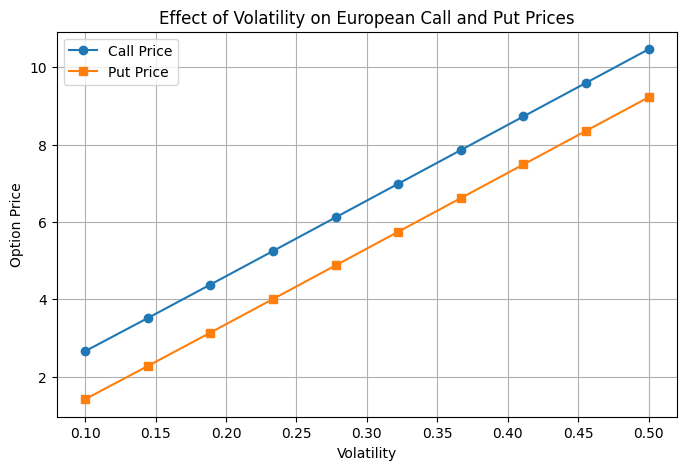

In [ ]:
import matplotlib.pyplot as plt
def compute_vega(S0, K, T, r, sigma, N, vega_shift=0.05):
    """
    Compute Vega for a European option using a binomial tree
    """
    call_original = binomial_tree_european(S0, K, T, r, sigma, N, "call")
    put_original = binomial_tree_european(S0, K, T, r, sigma, N, "put")

    # Adjust volatility
    sigma_new = sigma + vega_shift
    call_new = binomial_tree_european(S0, K, T, r, sigma_new, N, "call")
    put_new = binomial_tree_european(S0, K, T, r, sigma_new, N, "put")

    # Compute Vega
    vega_call = (call_new - call_original) / vega_shift
    vega_put = (put_new - put_original) / vega_shift

    return vega_call, vega_put

# Compute Delta for European Call and Put
delta_call, delta_put = compute_delta(S0, K, T, r, sigma, N)
print(f"Delta for European Call: {delta_call:.4f}")
print(f"Delta for European Put: {delta_put:.4f}")

# Compute Vega for European Call and Put
vega_call, vega_put = compute_vega(S0, K, T, r, sigma, N)
print(f"Vega for European Call: {vega_call:.4f}")
print(f"Vega for European Put: {vega_put:.4f}")

def plot_volatility_sensitivity(S0, K, T, r, sigma, N):
    """
    Visualize the effect of volatility on European call and put prices
    """
    volatilities = np.linspace(0.1, 0.5, 10)  # Volatility range from 10% to 50%
    call_prices = [binomial_tree_european(S0, K, T, r, vol, N, "call") for vol in volatilities]
    put_prices = [binomial_tree_european(S0, K, T, r, vol, N, "put") for vol in volatilities]

    plt.figure(figsize=(8, 5))
    plt.plot(volatilities, call_prices, label="Call Price", marker='o')
    plt.plot(volatilities, put_prices, label="Put Price", marker='s')
    plt.xlabel("Volatility")
    plt.ylabel("Option Price")
    plt.title("Effect of Volatility on European Call and Put Prices")
    plt.legend()
    plt.grid()
    plt.show()

# Given Parameters
S0 = 100   # Initial stock price
K = 100    # Strike price
T = 3/12   # 3 months in years
r = 0.05   # Risk-free rate (5%)
sigma = 0.20  # Volatility (20%)
N = 50    # Number of steps in the binomial tree

# Compute Vega for European Call and Put
vega_call, vega_put = compute_vega(S0, K, T, r, sigma, N)
print(f"Vega for European Call: {vega_call:.4f}")
print(f"Vega for European Put: {vega_put:.4f}")

# Plot the effect of volatility on option prices
plot_volatility_sensitivity(S0, K, T, r, sigma, N)

### Question 8

#### pricing American Options

#### Call

In [ ]:
import numpy as np

def american__option_call_price(S0, K, r, sigma, T, n):
    """
    function to price an american call option using a binomial tree
    """

    dt = T/n # Define time step
    u = np.exp(sigma * np.sqrt(dt)) # up Factor
    d = 1/u # down price movement factor
    p = (np.exp(r*dt) - d )/ (u-d) # risk neutral probability

    # Initialize stock price tree
    stock_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Option payoffs at maturity (call payoff)
    option_values = np.maximum(stock_prices[:, -1] - K, 0)

    # Backward induction with early exercise
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            # Continuation value
            continuation_value = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])
            # Intrinsic value (early exercise)
            intrinsic_value = max(stock_prices[j, i] - K, 0)
            # Option value at this node
            option_values[j] = max(intrinsic_value, continuation_value)

    # Return the call option price at time 0
    return option_values[0]

#### Put

In [ ]:
def american__option_put_price(S0, K, r, sigma, T, n):
    """
    function to price an american put option using a binomial tree
    """

    dt = T/n # Define time step
    u = np.exp(sigma * np.sqrt(dt)) # up Factor
    d = 1/u # down price movement factor
    p = (np.exp(r*dt) - d )/ (u-d) # risk neutral probability


    # Initialize stock price tree
    stock_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Option payoffs at maturity (put payoff)
    option_values = np.maximum(K - stock_prices[:, -1], 0)

    # Backward induction with early exercise
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            # Continuation value
            continuation_value = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])
            # Intrinsic value (early exercise)
            intrinsic_value = max(K - stock_prices[j, i], 0)
            # Option value at this node
            option_values[j] = max(intrinsic_value, continuation_value)

    # Return the put option price at time 0
    return option_values[0]

In [ ]:
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 3/12
n = 20

american_call = american__option_call_price(S0, K, r, sigma, T, n)
american_put = american__option_put_price(S0, K, r, sigma, T, n)


print(f"American Call price: {american_call: .2f}")
print(f"American Put option: {american_put: .2f}")

American Call price:  4.57
American Put option:  3.45


### Question 9

*Compute the Greek Delta for the European call and European put at time 0:*

In [ ]:
def american_option_delta(S0, K, r, sigma, T, n, option_type='call'):
    """
    function to compute Delta for an american option
    """
    dt = T/n # Define time step
    u = np.exp(sigma * np.sqrt(dt)) # up Factor
    d = 1/u # down price movement factor
    p = (np.exp(r*dt) - d )/ (u-d) # risk neutral probability

    # Stock prices at the first steps
    Su = S0 * u
    Sd = S0 * d

    # option prices at Su and Sd
    if option_type == 'call':
        Vu = american__option_call_price(Su, K, r, sigma, T-dt, n-1)
        Vd = american__option_call_price(Sd, K, r, sigma, T-dt, n-1)
    elif option_type == 'put':
        Vu = american__option_put_price(Su, K, r, sigma, T-dt, n-1)
        Vd = american__option_put_price(Sd, K, r, sigma, T-dt, n-1)
    else:
        raise ValueError('Invalid option_type. it is either call or put check and try again')

    # computing Delta
    delta = (Vu-Vd)/ (Su-Sd)
    return delta

In [ ]:
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 3/12
n = 20

american_call_delta = american_option_delta(S0, K, r, sigma, T, n, option_type='call')
american_put_delta = american_option_delta(S0, K, r, sigma, T, n, option_type='put')

print(f"American Call Option Delta: {american_call_delta: .4f}")
print(f"American put Option Delta: {american_put_delta: .4f}")



American Call Option Delta:  0.5686
American put Option Delta: -0.4515


### Question 10

*Compute the sensitivity of previous put and call option prices to a 5%
increase in volatility (from 20% to 25%)*

In [ ]:
def american_option_vega(S0, K, r, sigma_initial, sigma_final, T, n, option_type='call'):
    """
    Function to compute Vega for an American option
    """
    # Price the option at initial volatility
    if option_type == 'call':
        price_initial = american__option_call_price(S0, K, r, sigma_initial, T, n)
        price_final = american__option_call_price(S0, K, r, sigma_final, T, n)
    elif option_type == 'put':
        price_initial = american__option_put_price(S0, K, r, sigma_initial, T, n)
        price_final = american__option_put_price(S0, K, r, sigma_final, T, n)
    else:
        raise ValueError("Invalid option_type.It is either call or put check and try again")

    # Compute Vega
    vega = (price_final - price_initial) / (sigma_final - sigma_initial)
    return vega

In [ ]:

S0 = 100
K = 100
r = 0.05
sigma_initial = 0.20
sigma_final = 0.25
T = 3/12
n = 20

# Compute Vega for American call and put
american_call_vega_value = american_option_vega(S0, K, r, sigma_initial, sigma_final, T, n, option_type='call')
american_put_vega_value = american_option_vega(S0, K, r, sigma_initial, sigma_final, T, n, option_type='put')

print(f"American Call Vega: {american_call_vega_value: .4f}")
print(f"American Put Vega: {american_put_vega_value: .4f}")

American Call Vega:  19.4238
American Put Vega:  19.4241


### Question 11

In [ ]:
import numpy as np

def european_option_price(S0, K, r, sigma, T, n, option_type="call"):
    """
    Function to price a European call or put option using a binomial tree.

    Parameters:
    S0 - Initial stock price
    K - Strike price
    r - Risk-free interest rate
    sigma - Volatility
    T - Time to expiration
    n - Number of steps in the binomial tree
    option_type - "call" for call option, "put" for put option

    Returns:
    Option price at time 0
    """

    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initialize stock price tree
    stock_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Compute option payoffs at maturity
    if option_type == "call":
        option_values = np.maximum(stock_prices[:, -1] - K, 0)  # Call option payoff
    elif option_type == "put":
        option_values = np.maximum(K - stock_prices[:, -1], 0)  # Put option payoff
    else:
        raise ValueError("Invalid option_type. Choose 'call' or 'put'.")

    # Backward induction (No early exercise for European options)
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_values[j] = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])

    # Return the option price at time 0
    return option_values[0]

# Example Usage
S0 = 100  # Stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate (5%)
sigma = 0.2  # Volatility (20%)
T = 3/12  # 3 months expiration
n = 100  # Number of steps in binomial tree

# Calculate European Call and Put prices
european_call_price = european_option_price(S0, K, r, sigma, T, n, option_type="call")
european_put_price = european_option_price(S0, K, r, sigma, T, n, option_type="put")

print(f"European Call Price: {european_call_price:.4f}")
print(f"European Put Price: {european_put_price:.4f}")


European Call Price: 4.6050
European Put Price: 3.3628


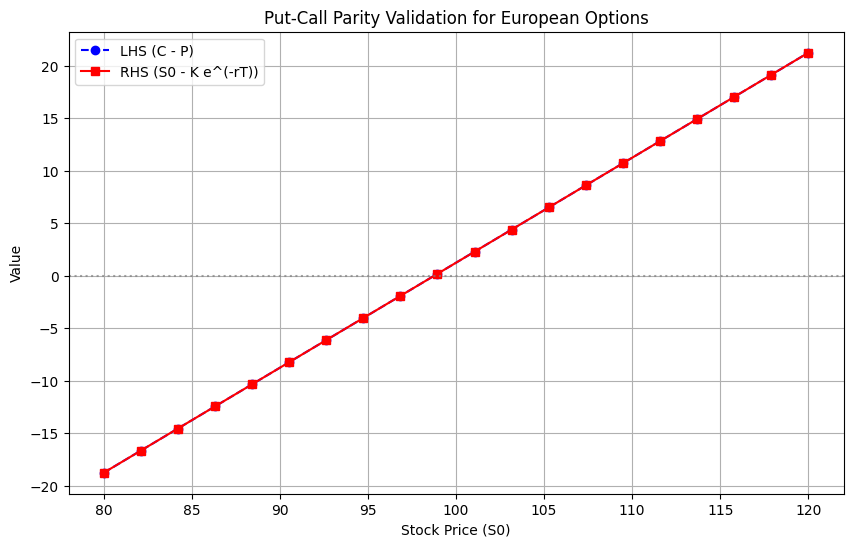

In [ ]:
import matplotlib.pyplot as plt

# Parameters
S0_range = np.linspace(80, 120, 20)  # Varying stock price S0 from $80 to $120
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # Time to expiration (3 months)
n = 100  # Number of steps in the binomial tree

# Compute European call and put option prices for different stock prices
european_calls = np.array([european_option_price(S, K, r, sigma, T, n, "call") for S in S0_range])
european_puts = np.array([european_option_price(S, K, r, sigma, T, n, "put") for S in S0_range])

# Compute LHS and RHS of put-call parity
lhs_put_call_parity = european_calls - european_puts  # C - P
rhs_put_call_parity = S0_range - K * np.exp(-r * T)  # S0 - K e^(-rT)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(S0_range, lhs_put_call_parity, label="LHS (C - P)", linestyle="--", marker="o", color='blue')
plt.plot(S0_range, rhs_put_call_parity, label="RHS (S0 - K e^(-rT))", linestyle="-", marker="s", color='red')
plt.axhline(0, color="grey", linestyle="dotted", alpha=0.7)
plt.xlabel("Stock Price (S0)")
plt.ylabel("Value")
plt.title("Put-Call Parity Validation for European Options")
plt.legend()
plt.grid(True)
plt.show()

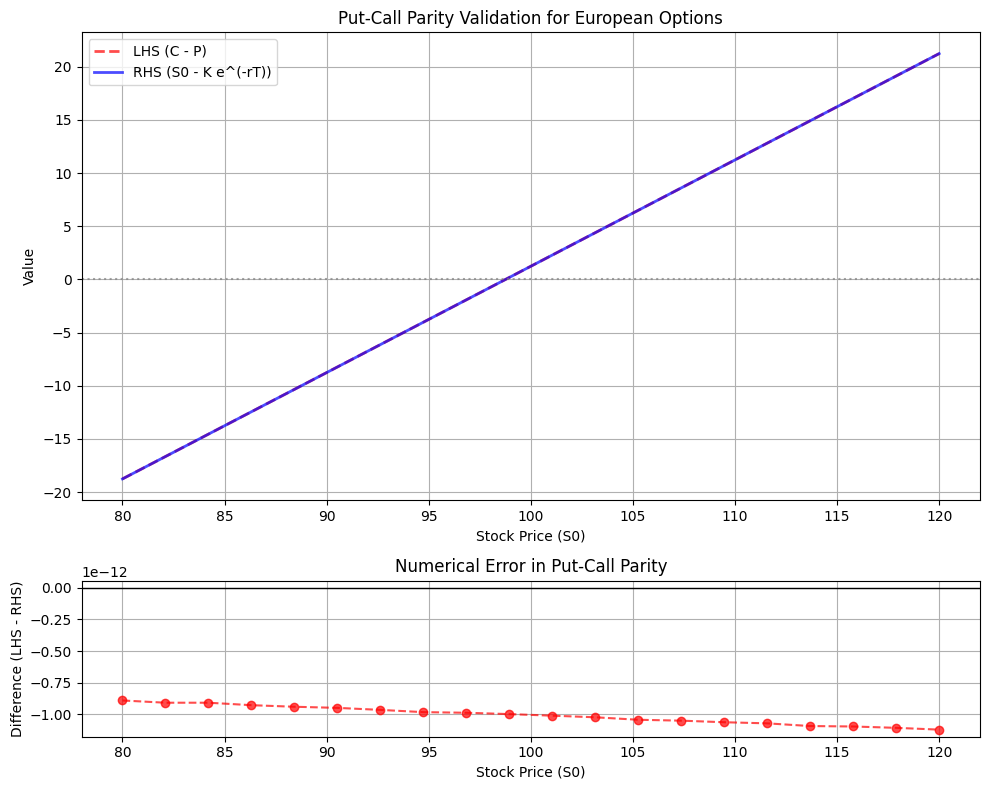

In [ ]:
# Compute numerical differences
difference = lhs_put_call_parity - rhs_put_call_parity

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Main plot: Put-Call Parity validation
ax[0].plot(S0_range, lhs_put_call_parity, label="LHS (C - P)", linestyle="--", linewidth=2, color='red', alpha=0.7)
ax[0].plot(S0_range, rhs_put_call_parity, label="RHS (S0 - K e^(-rT))", linestyle="-", linewidth=2, color='blue', alpha=0.7)
ax[0].axhline(0, color="grey", linestyle="dotted", alpha=0.7)
ax[0].set_xlabel("Stock Price (S0)")
ax[0].set_ylabel("Value")
ax[0].set_title("Put-Call Parity Validation for European Options")
ax[0].legend()
ax[0].grid(True)

# Secondary plot: Difference between LHS and RHS
ax[1].plot(S0_range, difference, linestyle="dashed", marker="o", color="red", alpha=0.7)
ax[1].axhline(0, color="black", linestyle="solid", linewidth=1)
ax[1].set_xlabel("Stock Price (S0)")
ax[1].set_ylabel("Difference (LHS - RHS)")
ax[1].set_title("Numerical Error in Put-Call Parity")
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Question 12

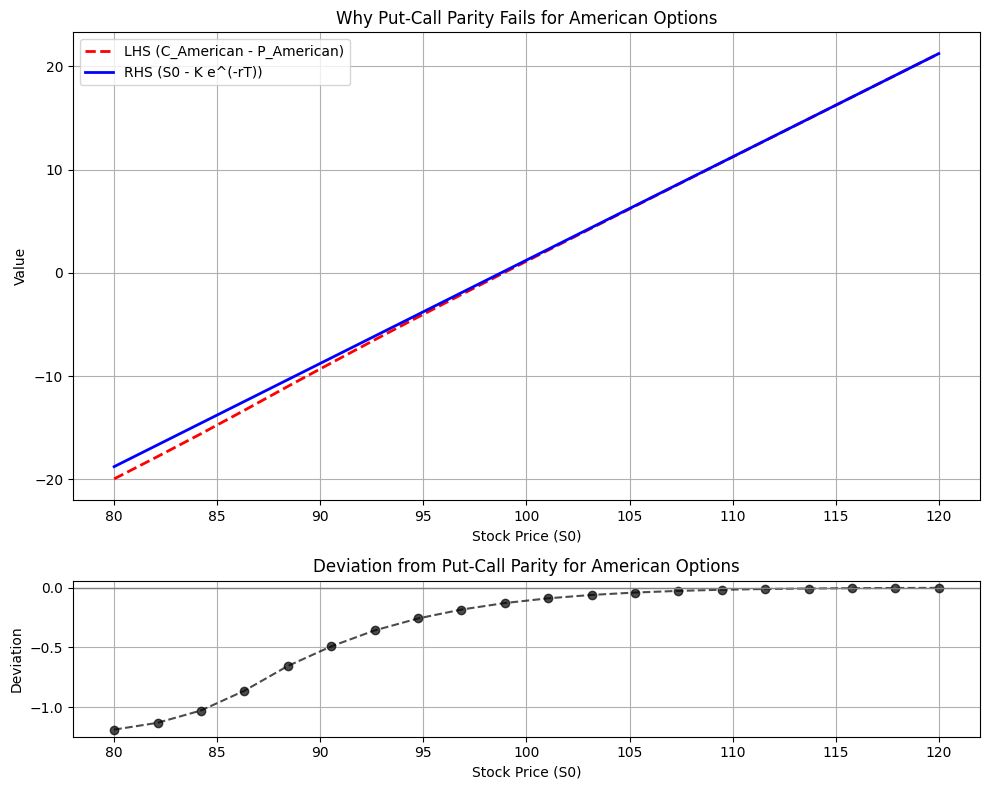

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# American Option Pricing Function (Binomial Tree)
def american_option_price(S0, K, r, sigma, T, n, option_type="call"):
    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initialize stock price tree
    stock_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Compute option payoffs at maturity
    if option_type == "call":
        option_values = np.maximum(stock_prices[:, -1] - K, 0)  # Call option payoff
    elif option_type == "put":
        option_values = np.maximum(K - stock_prices[:, -1], 0)  # Put option payoff
    else:
        raise ValueError("Invalid option_type. Choose 'call' or 'put'.")

    # Backward induction with early exercise check
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            continuation_value = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])
            intrinsic_value = max(stock_prices[j, i] - K, 0) if option_type == "call" else max(K - stock_prices[j, i], 0)
            option_values[j] = max(intrinsic_value, continuation_value)  # Early exercise check

    return option_values[0]

# Parameters
S0_range = np.linspace(80, 120, 20)  # Varying stock price S0 from $80 to $120
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # Time to expiration (3 months)
n = 100  # Number of steps in the binomial tree

# Compute American call and put option prices for different stock prices
american_calls = np.array([american_option_price(S, K, r, sigma, T, n, "call") for S in S0_range])
american_puts = np.array([american_option_price(S, K, r, sigma, T, n, "put") for S in S0_range])

# Compute LHS and RHS of put-call parity for American options
lhs_american = american_calls - american_puts  # C_American - P_American
rhs_american = S0_range - K * np.exp(-r * T)  # S0 - K e^(-rT)

# Compute the deviation (error in put-call parity)
deviation = lhs_american - rhs_american

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Main plot: American Option Put-Call Parity Validation
ax[0].plot(S0_range, lhs_american, label="LHS (C_American - P_American)", linestyle="--", linewidth=2, color='red')
ax[0].plot(S0_range, rhs_american, label="RHS (S0 - K e^(-rT))", linestyle="-", linewidth=2, color='blue')
ax[0].set_xlabel("Stock Price (S0)")
ax[0].set_ylabel("Value")
ax[0].set_title("Why Put-Call Parity Fails for American Options")
ax[0].legend()
ax[0].grid(True)

# Secondary plot: Deviation from Put-Call Parity
ax[1].plot(S0_range, deviation, linestyle="dashed", marker="o", color="black", alpha=0.7)
ax[1].axhline(0, color="grey", linestyle="solid", linewidth=1)
ax[1].set_xlabel("Stock Price (S0)")
ax[1].set_ylabel("Deviation")
ax[1].set_title("Deviation from Put-Call Parity for American Options")
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Question 13

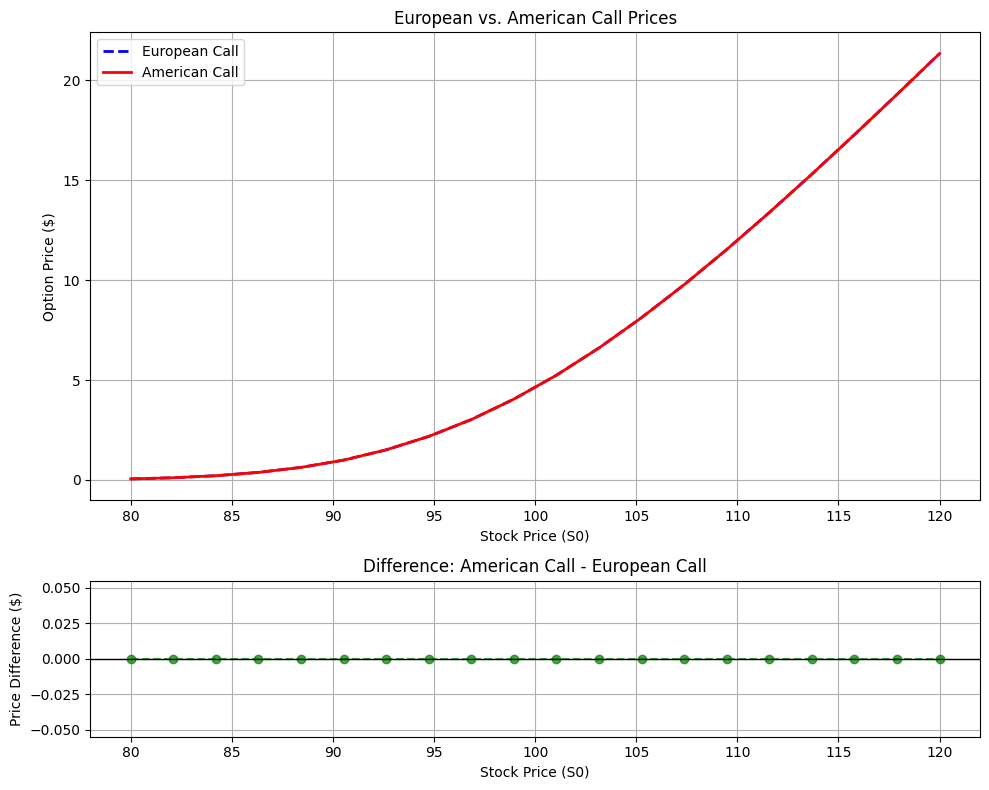

In [ ]:
# Parameters
S0_range = np.linspace(80, 120, 20)  # Varying stock price S0 from $80 to $120
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # 3 months expiration
n = 100  # Number of steps in the binomial tree

# Compute European and American call prices for different stock prices
european_calls = np.array([european_option_price(S, K, r, sigma, T, n, "call") for S in S0_range])
american_calls = np.array([american_option_price(S, K, r, sigma, T, n, "call") for S in S0_range])

# Compute the difference (American - European)
call_difference = american_calls - european_calls

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Main plot: European vs. American Call Prices
ax[0].plot(S0_range, european_calls, label="European Call", linestyle="--", linewidth=2, color='blue')
ax[0].plot(S0_range, american_calls, label="American Call", linestyle="-", linewidth=2, color='red')
ax[0].set_xlabel("Stock Price (S0)")
ax[0].set_ylabel("Option Price ($)")
ax[0].set_title("European vs. American Call Prices")
ax[0].legend()
ax[0].grid(True)

# Secondary plot: Difference (American Call - European Call)
ax[1].plot(S0_range, call_difference, linestyle="dashed", marker="o", color="green", alpha=0.7)
ax[1].axhline(0, color="black", linestyle="solid", linewidth=1)
ax[1].set_xlabel("Stock Price (S0)")
ax[1].set_ylabel("Price Difference ($)")
ax[1].set_title("Difference: American Call - European Call")
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Question 14

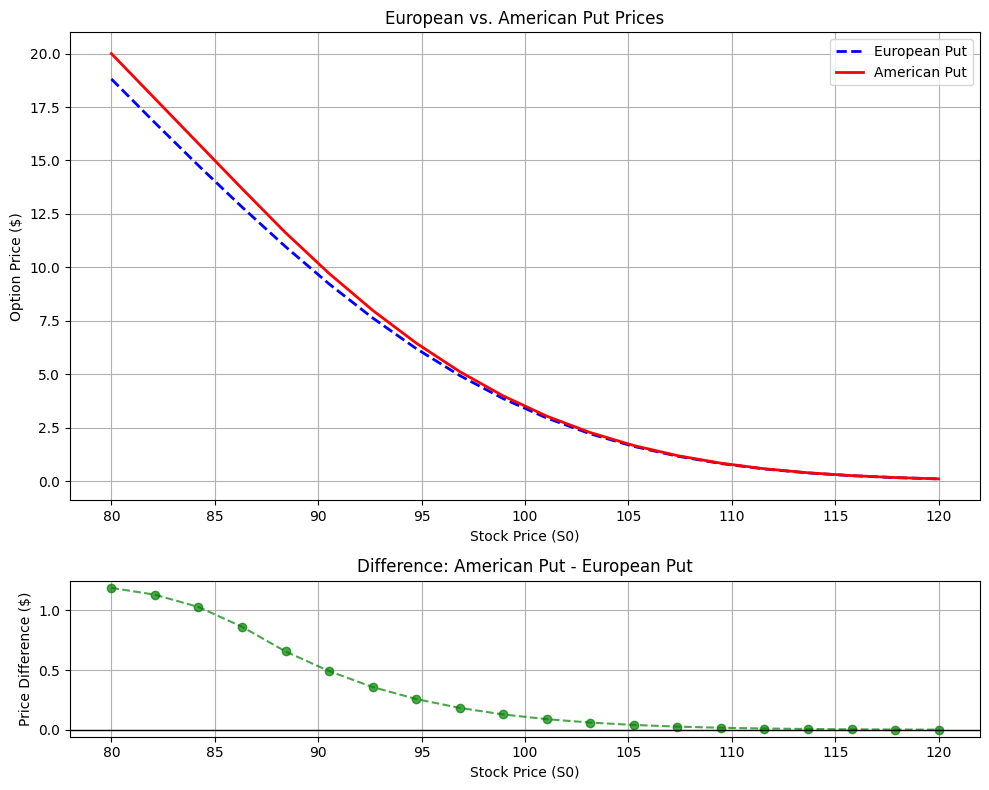

In [ ]:
# Parameters
S0_range = np.linspace(80, 120, 20)  # Varying stock price S0 from $80 to $120
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # 3 months expiration
n = 100  # Number of steps in the binomial tree

# Compute European and American put prices for different stock prices
european_puts = np.array([european_option_price(S, K, r, sigma, T, n, "put") for S in S0_range])
american_puts = np.array([american_option_price(S, K, r, sigma, T, n, "put") for S in S0_range])

# Compute the difference (American - European)
put_difference = american_puts - european_puts

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Main plot: European vs. American Put Prices
ax[0].plot(S0_range, european_puts, label="European Put", linestyle="--", linewidth=2, color='blue')
ax[0].plot(S0_range, american_puts, label="American Put", linestyle="-", linewidth=2, color='red')
ax[0].set_xlabel("Stock Price (S0)")
ax[0].set_ylabel("Option Price ($)")
ax[0].set_title("European vs. American Put Prices")
ax[0].legend()
ax[0].grid(True)

# Secondary plot: Difference (American Put - European Put)
ax[1].plot(S0_range, put_difference, linestyle="dashed", marker="o", color="green", alpha=0.7)
ax[1].axhline(0, color="black", linestyle="solid", linewidth=1)
ax[1].set_xlabel("Stock Price (S0)")
ax[1].set_ylabel("Price Difference ($)")
ax[1].set_title("Difference: American Put - European Put")
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Step 2

### Question  15

*Select 5 strike prices so that Call options are: Deep OTM, OTM, ATM, ITM, and
Deep ITM. (E.g., you can do this by selecting moneyness of 90%, 95%, ATM, 105%,
110%; where moneyness is measured as K/S0):*  
- *Using the trinomial tree, price the Call option corresponding to the 5
different strikes selected. (Unless stated otherwise, consider input data
given in Step 1).*   

- *Comment on the trend you observe (e.g., increasing/decreasing in
moneyness) in option prices and whether it makes sense.*

#### Call  Option

In [ ]:
def trinomial_tree_european_call(S0, K, r, sigma, T, n):
    """
    Function to price a European call option using a trinomial tree.
    """

    dt = T / n # Step size in time
    u = np.exp(sigma * np.sqrt(3 * dt))  # Up factor
    d = 1 / u                           # Down factor
    m = 1                               # Middle factor

    # Risk-neutral probabilities
    pu = ((np.exp((r - 0) * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp((r - 0) * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd

    # Initialize stock price tree
    stock_prices = np.zeros((2 * n + 1, n + 1))
    for i in range(n + 1):
        for j in range(2 * i + 1):
            stock_prices[j, i] = S0 * (u ** max(i - j, 0)) * (d ** max(j - i, 0))

    # Option payoffs at maturity
    option_values = np.maximum(stock_prices[:, -1] - K, 0)

    # Backward induction
    for i in range(n - 1, -1, -1):
        for j in range(2 * i + 1):
            option_values[j] = np.exp(-r * dt) * (
                pu * option_values[j] +
                pm * option_values[j + 1] +
                pd * option_values[j + 2]
            )

    # Return the call option price at time 0
    return round(option_values[0], 2)


In [ ]:
import pandas as pd
# Calling the function
S0 = 100       # Current stock price
r = 0.05       # Risk-free rate
sigma = 0.20   # Volatility
T = 3/12      # Time to maturity
n = 10         # Number of steps

# Define strike prices for different moneyness levels
strike_prices = [110, 105, 100, 95, 90]  # Deep OTM, OTM, ATM, ITM, Deep ITM

# Price European call options for each strike price
call_prices = [trinomial_tree_european_call(S0, K, r, sigma, T, n) for K in strike_prices]

# Organize results in a table
results = {
    "Moneyness": ["Deep OTM", "OTM", "ATM", "ITM", "Deep ITM"],
    "Strike Price": strike_prices,
    "Call Price": call_prices
}

results_df = pd.DataFrame(results)

results_df

,Moneyness,Strike Price,Call Price
0,Deep OTM,110,2.03
1,OTM,105,3.50
2,ATM,100,5.68
3,ITM,95,8.73
4,Deep ITM,90,12.49


#### Put Option

In [ ]:
def trinomial_tree_european_put(S0, K, r, sigma, T, n):
    """
    Function to price a European put option using a trinomial tree.
    """
    dt = T / n # Step size in time
    u = np.exp(sigma * np.sqrt(3 * dt))  # Up factor
    d = 1 / u                           # Down factor


    # Risk-neutral probabilities
    pu = ((np.exp((r - 0) * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp((r - 0) * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd

    # Initialize stock price tree
    stock_prices = np.zeros((2 * n + 1, n + 1))
    for i in range(n + 1):
        for j in range(2 * i + 1):
            stock_prices[j, i] = S0 * (u ** max(i - j, 0)) * (d ** max(j - i, 0))

    # Option payoffs at maturity
    option_values = np.maximum(K - stock_prices[:, -1], 0)

    # Backward induction
    for i in range(n - 1, -1, -1):
        for j in range(2 * i + 1):
            option_values[j] = np.exp(-r * dt) * (
                pu * option_values[j] +
                pm * option_values[j + 1] +
                pd * option_values[j + 2]
            )

    # Return the put option price at time 0
    return round(option_values[0], 2)

In [ ]:
# Calling the function
S0 = 100       # Current stock price
r = 0.05       # Risk-free rate
sigma = 0.20   # Volatility
T = 3/12      # Time to maturity
n = 10         # Number of steps

# Define strike prices for different moneyness levels
strike_prices = [90, 95, 100, 105, 110]  # Deep OTM, OTM, ATM, ITM, Deep ITM

# Price European caputll options for each strike price
put_prices = [trinomial_tree_european_put(S0, K, r, sigma, T, n) for K in strike_prices]

# Organize results in a table
results = {
    "Moneyness": ["Deep OTM", "OTM", "ATM", "ITM", "Deep ITM"],
    "Strike Price": strike_prices,
    "Put Price": put_prices
}

results_df = pd.DataFrame(results)

results_df

,Moneyness,Strike Price,Put Price
0,Deep OTM,90,0.95
1,OTM,95,2.13
2,ATM,100,4.02
3,ITM,105,6.77
4,Deep ITM,110,10.24


### Question 17

In [ ]:
import numpy as np

def trinomial_tree_american_call(S0, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1  # Middle state where stock price remains unchanged

    # Risk-neutral probabilities
    pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pm = 1 - pu - pd  # Middle state probability

    # Initialize asset prices at maturity
    ST = np.zeros((2 * N + 1, N + 1))
    ST[N, 0] = S0  # Start from the middle

    for i in range(1, N + 1):
        ST[N - i, i] = ST[N - i + 1, i - 1] * u  # Up move
        for j in range(1, 2 * i):
            ST[N - i + j, i] = ST[N - i + j - 1, i - 1] * m  # Middle move
        ST[N + i, i] = ST[N + i - 1, i - 1] * d  # Down move

    # Initialize option values at maturity
    option_values = np.zeros((2 * N + 1, N + 1))
    for j in range(2 * N + 1):
        option_values[j, N] = max(ST[j, N] - K, 0)  # Call payoff

    # Backward induction
    for i in range(N - 1, -1, -1):
        for j in range(2 * i + 1):
            option_values[N - i + j, i] = np.exp(-r * dt) * (
                pu * option_values[N - i + j - 1, i + 1] +
                pm * option_values[N - i + j, i + 1] +
                pd * option_values[N - i + j + 1, i + 1]
            )
            # Check for early exercise
            option_values[N - i + j, i] = max(option_values[N - i + j, i], ST[N - i + j, i] - K)

    return option_values[N, 0]

# Parameters
S0 = 100
r = 0.05
sigma = 0.20
T = 0.25  # 3 months
N = 100  # Number of steps

# Strike prices for call options
strikes = [90, 95, 100, 105, 110]

# Price American call options
print("American Call Option Prices:")
for K in strikes:
    price = trinomial_tree_american_call(S0, K, T, r, sigma, N)
    print(f"Strike: {K}, Price: {price:.2f}")


American Call Option Prices:
Strike: 90, Price: 105.02
Strike: 95, Price: 100.16
Strike: 100, Price: 95.30
Strike: 105, Price: 90.43
Strike: 110, Price: 85.57


### Question 18

In [ ]:
import numpy as np

def trinomial_tree_american_put(S0, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1  # Middle state where stock price remains unchanged

    # Risk-neutral probabilities
    pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pm = 1 - pu - pd  # Middle state probability

    # Initialize asset prices at maturity
    ST = np.zeros((2 * N + 1, N + 1))
    ST[N, 0] = S0  # Start from the middle

    for i in range(1, N + 1):
        ST[N - i, i] = ST[N - i + 1, i - 1] * u  # Up move
        for j in range(1, 2 * i):
            ST[N - i + j, i] = ST[N - i + j - 1, i - 1] * m  # Middle move
        ST[N + i, i] = ST[N + i - 1, i - 1] * d  # Down move

    # Initialize option values at maturity
    option_values = np.zeros((2 * N + 1, N + 1))
    for j in range(2 * N + 1):
        option_values[j, N] = max(K - ST[j, N], 0)  # Put payoff

    # Backward induction
    for i in range(N - 1, -1, -1):
        for j in range(2 * i + 1):
            option_values[N - i + j, i] = np.exp(-r * dt) * (
                pu * option_values[N - i + j - 1, i + 1] +
                pm * option_values[N - i + j, i + 1] +
                pd * option_values[N - i + j + 1, i + 1]
            )
            # Check for early exercise
            option_values[N - i + j, i] = max(option_values[N - i + j, i], K - ST[N - i + j, i])

    return option_values[N, 0]

# Parameters
S0 = 100
r = 0.05
sigma = 0.20
T = 0.25  # 3 months
N = 100  # Number of steps

# Strike prices for put options
strikes = [90, 95, 100, 105, 110]

# Price American put options
print("American Put Option Prices:")
for K in strikes:
    price = trinomial_tree_american_put(S0, K, T, r, sigma, N)
    print(f"Strike: {K}, Price: {price:.2f}")


American Put Option Prices:
Strike: 90, Price: 89.98
Strike: 95, Price: 94.98
Strike: 100, Price: 99.98
Strike: 105, Price: 104.97
Strike: 110, Price: 109.97


### Question 19

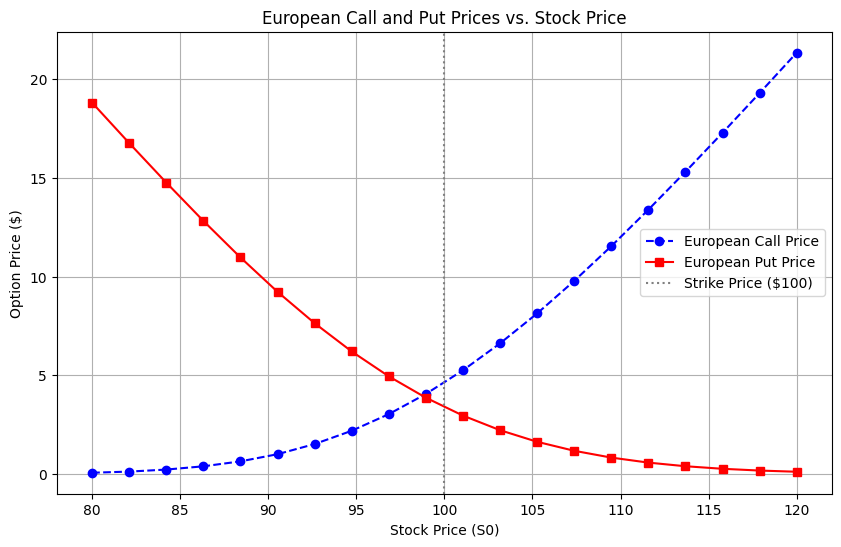

In [ ]:
# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # 3 months expiration
n = 100  # Number of steps in binomial tree

# Generate a range of stock prices
S0_range = np.linspace(80, 120, 20)

# Compute European call and put prices for different stock prices
european_calls = np.array([european_option_price(S, K, r, sigma, T, n, "call") for S in S0_range])
european_puts = np.array([european_option_price(S, K, r, sigma, T, n, "put") for S in S0_range])

# Plot European call and put prices vs. stock price
plt.figure(figsize=(10, 6))
plt.plot(S0_range, european_calls, label="European Call Price", linestyle="--", marker="o", color='blue')
plt.plot(S0_range, european_puts, label="European Put Price", linestyle="-", marker="s", color='red')
plt.axvline(x=K, color='grey', linestyle="dotted", label="Strike Price ($100)")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Option Price ($)")
plt.title("European Call and Put Prices vs. Stock Price")
plt.legend()
plt.grid(True)
plt.show()

### Question 20

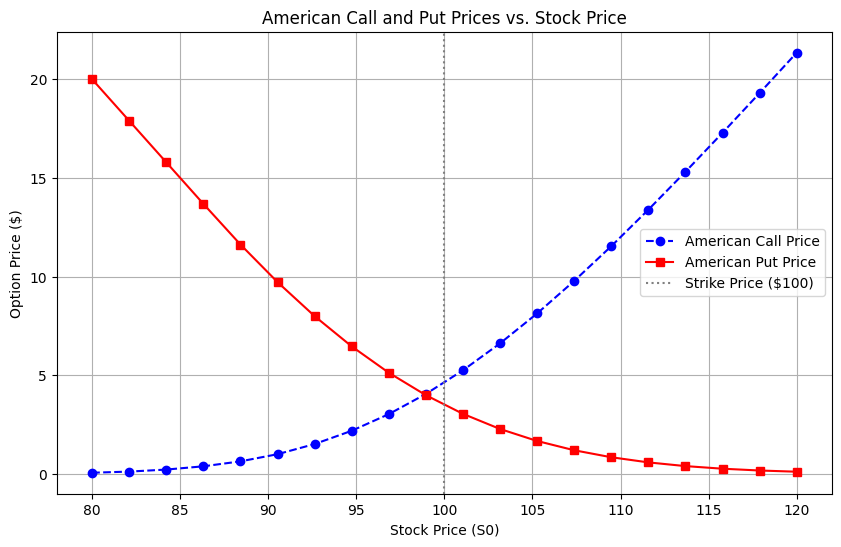

In [ ]:
# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # 3 months expiration
n = 100  # Number of steps in binomial tree

# Generate a range of stock prices
S0_range = np.linspace(80, 120, 20)

# Compute American call and put prices for different stock prices
american_calls = np.array([american_option_price(S, K, r, sigma, T, n, "call") for S in S0_range])
american_puts = np.array([american_option_price(S, K, r, sigma, T, n, "put") for S in S0_range])

# Plot American call and put prices vs. stock price
plt.figure(figsize=(10, 6))
plt.plot(S0_range, american_calls, label="American Call Price", linestyle="--", marker="o", color='blue')
plt.plot(S0_range, american_puts, label="American Put Price", linestyle="-", marker="s", color='red')
plt.axvline(x=K, color='grey', linestyle="dotted", label="Strike Price ($100)")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Option Price ($)")
plt.title("American Call and Put Prices vs. Stock Price")
plt.legend()
plt.grid(True)
plt.show()

### Question 21

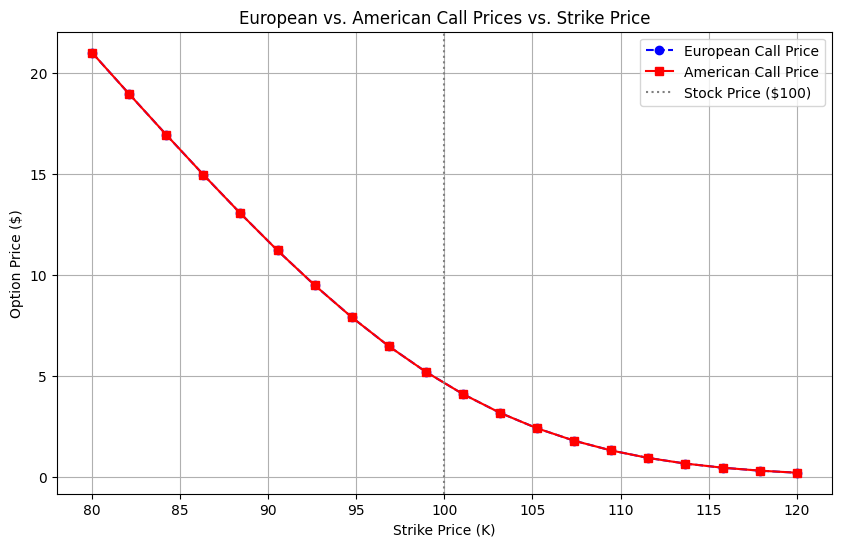

In [ ]:
# Parameters
S0 = 100  # Fixed stock price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # 3 months expiration
n = 100  # Number of steps in binomial tree

# Generate a range of strike prices
K_range = np.linspace(80, 120, 20)  # Strike prices from $80 to $120

# Compute European and American call prices for different strike prices
european_calls_strike = np.array([european_option_price(S0, K, r, sigma, T, n, "call") for K in K_range])
american_calls_strike = np.array([american_option_price(S0, K, r, sigma, T, n, "call") for K in K_range])

# Plot European and American call prices vs. strike price
plt.figure(figsize=(10, 6))
plt.plot(K_range, european_calls_strike, label="European Call Price", linestyle="--", marker="o", color='blue')
plt.plot(K_range, american_calls_strike, label="American Call Price", linestyle="-", marker="s", color='red')
plt.axvline(x=S0, color='grey', linestyle="dotted", label="Stock Price ($100)")
plt.xlabel("Strike Price (K)")
plt.ylabel("Option Price ($)")
plt.title("European vs. American Call Prices vs. Strike Price")
plt.legend()
plt.grid(True)
plt.show()

### Question 22

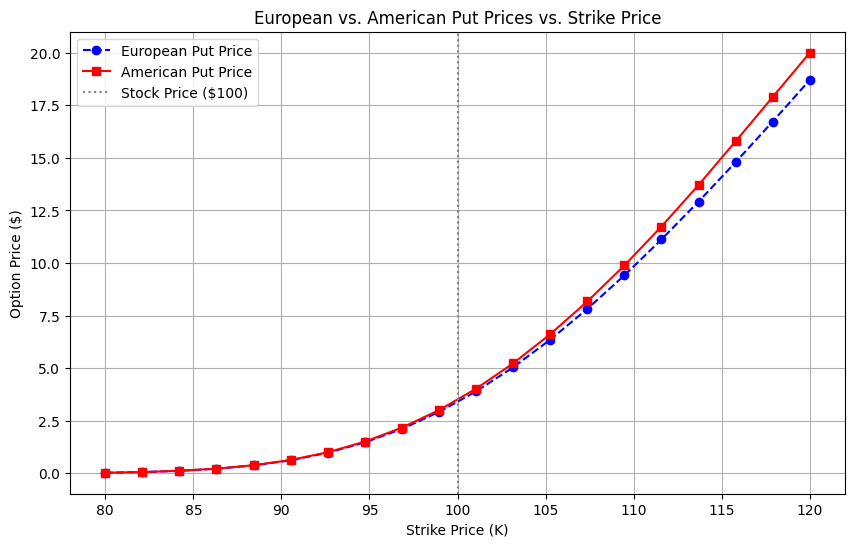

In [ ]:
# Parameters
S0 = 100  # Fixed stock price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3 / 12  # 3 months expiration
n = 100  # Number of steps in binomial tree

# Generate a range of strike prices
K_range = np.linspace(80, 120, 20)  # Strike prices from $80 to $120

# Compute European and American put prices for different strike prices
european_puts_strike = np.array([european_option_price(S0, K, r, sigma, T, n, "put") for K in K_range])
american_puts_strike = np.array([american_option_price(S0, K, r, sigma, T, n, "put") for K in K_range])

# Plot European and American put prices vs. strike price
plt.figure(figsize=(10, 6))
plt.plot(K_range, european_puts_strike, label="European Put Price", linestyle="--", marker="o", color='blue')
plt.plot(K_range, american_puts_strike, label="American Put Price", linestyle="-", marker="s", color='red')
plt.axvline(x=S0, color='grey', linestyle="dotted", label="Stock Price ($100)")
plt.xlabel("Strike Price (K)")
plt.ylabel("Option Price ($)")
plt.title("European vs. American Put Prices vs. Strike Price")
plt.legend()
plt.grid(True)
plt.show()

### Question 23

   Strike Price  Call Price  Put Price  LHS (C - P)  RHS (S0 - K * e^(-rT))  \
0           110        2.03      10.24        -8.21               -8.633558   
1           105        3.50       6.77        -3.27               -3.695669   
2           100        5.68       4.02         1.66                1.242220   
3            95        8.73       2.13         6.60                6.180109   
4            90       12.49       0.95        11.54               11.117998   

   Difference  
0    0.423558  
1    0.425669  
2    0.417780  
3    0.419891  
4    0.422002  


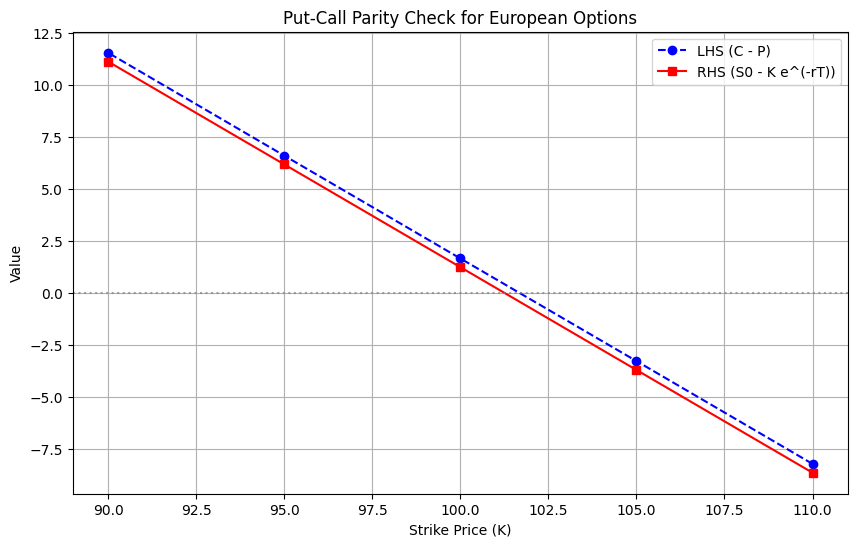

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given strike prices and option prices from the notebook
strike_prices = np.array([110, 105, 100, 95, 90])  # Strike prices

# European call and put prices from the notebook
european_call_prices = np.array([2.03, 3.50, 5.68, 8.73, 12.49])
european_put_prices = np.array([10.24, 6.77, 4.02, 2.13, 0.95])

# Parameters
S0 = 100  # Stock price
r = 0.05  # Risk-free rate
T = 3 / 12  # 3 months expiration

# Calculate the right-hand side of put-call parity: S0 - K * exp(-rT)
rhs_put_call_parity = S0 - strike_prices * np.exp(-r * T)

# Calculate the left-hand side of put-call parity: C - P
lhs_put_call_parity = european_call_prices - european_put_prices

# Compute the difference (should be near zero if put-call parity holds)
parity_difference = lhs_put_call_parity - rhs_put_call_parity

# Create a table for results
parity_results = pd.DataFrame({
    "Strike Price": strike_prices,
    "Call Price": european_call_prices,
    "Put Price": european_put_prices,
    "LHS (C - P)": lhs_put_call_parity,
    "RHS (S0 - K * e^(-rT))": rhs_put_call_parity,
    "Difference": parity_difference
})

# Print the results
print(parity_results)

# Plot the comparison of LHS and RHS of put-call parity
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, lhs_put_call_parity, label="LHS (C - P)", linestyle="--", marker="o", color='blue')
plt.plot(strike_prices, rhs_put_call_parity, label="RHS (S0 - K e^(-rT))", linestyle="-", marker="s", color='red')
plt.axhline(0, color="grey", linestyle="dotted", alpha=0.7)
plt.xlabel("Strike Price (K)")
plt.ylabel("Value")
plt.title("Put-Call Parity Check for European Options")
plt.legend()
plt.grid(True)
plt.show()


### Question 24

   Strike Price  American Call Price  American Put Price  LHS (C - P)  \
0            90               105.02               89.98        15.04   
1            95               100.16               94.98         5.18   
2           100                95.30               99.98        -4.68   
3           105                90.43              104.97       -14.54   
4           110                85.57              109.97       -24.40   

   RHS (S0 - K * e^(-rT))  Difference  
0               11.117998    3.922002  
1                6.180109   -1.000109  
2                1.242220   -5.922220  
3               -3.695669  -10.844331  
4               -8.633558  -15.766442  


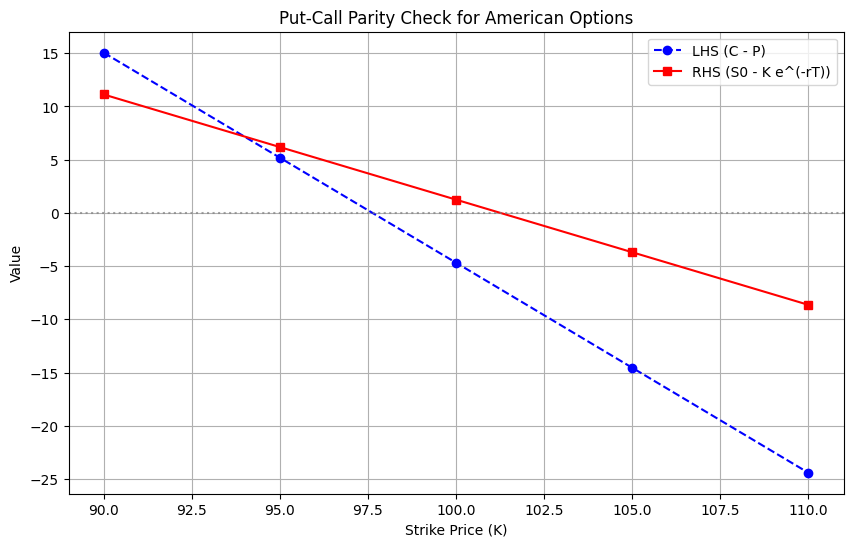

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given strike prices and American option prices from the trinomial tree (Q17 & Q18)
strike_prices_trinomial = np.array([90, 95, 100, 105, 110])  # Strike prices

# American call and put prices from the trinomial tree
american_call_prices = np.array([105.02, 100.16, 95.30, 90.43, 85.57])
american_put_prices = np.array([89.98, 94.98, 99.98, 104.97, 109.97])

# Parameters
S0 = 100  # Stock price
r = 0.05  # Risk-free rate
T = 3 / 12  # 3 months expiration

# Calculate the right-hand side of put-call parity: S0 - K * exp(-rT)
rhs_put_call_parity_american = S0 - strike_prices_trinomial * np.exp(-r * T)

# Calculate the left-hand side of put-call parity: C - P
lhs_put_call_parity_american = american_call_prices - american_put_prices

# Compute the difference (should be near zero if put-call parity holds)
parity_difference_american = lhs_put_call_parity_american - rhs_put_call_parity_american

# Create a table for results
parity_results_american = pd.DataFrame({
    "Strike Price": strike_prices_trinomial,
    "American Call Price": american_call_prices,
    "American Put Price": american_put_prices,
    "LHS (C - P)": lhs_put_call_parity_american,
    "RHS (S0 - K * e^(-rT))": rhs_put_call_parity_american,
    "Difference": parity_difference_american
})

# Print the results
print(parity_results_american)

# Plot the comparison of LHS and RHS of put-call parity for American options
plt.figure(figsize=(10, 6))
plt.plot(strike_prices_trinomial, lhs_put_call_parity_american, label="LHS (C - P)", linestyle="--", marker="o", color='blue')
plt.plot(strike_prices_trinomial, rhs_put_call_parity_american, label="RHS (S0 - K e^(-rT))", linestyle="-", marker="s", color='red')
plt.axhline(0, color="grey", linestyle="dotted", alpha=0.7)
plt.xlabel("Strike Price (K)")
plt.ylabel("Value")
plt.title("Put-Call Parity Check for American Options")
plt.legend()
plt.grid(True)
plt.show()


## Step 3

### Question  26 : American Put Option Pricing and Delta Hedging

*Using the same data from Q25, price an American Put option. Still, assume you
are acting as the seller of this put. Consider now 25 steps in the tree (do this via python code)*
- *Compute the delta hedging needed at each node in each step*
- *Show the evolution of the cash-account throughout the different steps for
one path of your choice*

since  we must first calculate the option  price, we will use of the function we had created earlier

##### Pricing an American Put option

In [ ]:
def american__option_put_price(S0, K, r, sigma, T, n):
    """
    function to price an american put option using a binomial tree
    """

    dt = T/n # Define time step
    u = np.exp(sigma * np.sqrt(dt)) # up Factor
    d = 1/u # down price movement factor
    p = (np.exp(r*dt) - d )/ (u-d) # risk neutral probability


    # Initialize stock price tree
    stock_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Option payoffs at maturity (put payoff)
    option_values = np.maximum(K - stock_prices[:, -1], 0)

    # Backward induction with early exercise
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            # Continuation value
            continuation_value = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])
            # Intrinsic value (early exercise)
            intrinsic_value = max(K - stock_prices[j, i], 0)
            # Option value at this node
            option_values[j] = max(intrinsic_value, continuation_value)

    # Return the put option price at time 0
    return option_values[0]

#### Delta Hedging

In [ ]:
def delta_hedging_process(S0, K, r, sigma, T, n):
    """
    Function to simulate the Delta hedging process for an American Put option.
    """
    dt = T/n # Define time step
    u = np.exp(sigma * np.sqrt(dt)) # up Factor
    d = 1/u # down price movement factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initialize stock price tree
    stock_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Option values at maturity
    option_values = np.maximum(K - stock_prices[:, -1], 0)

    # Backward induction with early exercise
    deltas = np.zeros((n + 1, n + 1))
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            continuation_value = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])
            intrinsic_value = max(K - stock_prices[j, i], 0)
            option_values[j] = max(intrinsic_value, continuation_value)

            # Compute Delta
            if i > 0:
                Su = stock_prices[j, i + 1]
                Sd = stock_prices[j + 1, i + 1]
                Vu = option_values[j]
                Vd = option_values[j + 1]
                deltas[j, i] = (Vu - Vd) / (Su - Sd)

    # Simulate one path in the tree
    path_stock_prices = [S0]
    path_option_values = [option_values[0]]
    path_deltas = [deltas[0, 0]]
    cash_account = [0]  # Initial cash account balance

    current_shares = 0
    for i in range(1, n + 1):
        # Update stock price along the chosen path (assume up movement for simplicity)
        path_stock_prices.append(path_stock_prices[-1] * u)

        # Update option value
        path_option_values.append(option_values[i])

        # Update Delta
        path_deltas.append(deltas[i - 1, i - 1])

        # Adjust shares and update cash account
        new_shares = path_deltas[-1]
        shares_bought = new_shares - current_shares
        cash_account.append(cash_account[-1] - shares_bought * path_stock_prices[-1] + path_option_values[-1] * np.exp(-r * dt))
        current_shares = new_shares

    # Organize results in a dictionary
    results = {
        "Time Step": list(range(n + 1)),
        "Stock Price": np.round(path_stock_prices, 2),
        "Option Value": np.round(path_option_values, 2),
        "Delta": np.round(path_deltas, 4),
        "Shares Bought/Sold": np.round([path_deltas[i] - path_deltas[i - 1] if i > 0 else 0 for i in range(n + 1)], 6),
        "Cash Account": np.round(cash_account, 2)
    }

    return results


In [ ]:
#Calling the function
S0 = 180
K = 182       # Current stock price
r = 0.02       # Risk-free rate
sigma = 0.25   # Volatility
T = 6/12      # Time to maturity
n = 25         # Number of steps
hedging_results = delta_hedging_process(S0, K, r, sigma, T, n)

#Result DF
hedging_results_df = pd.DataFrame(hedging_results).set_index('Time Step')

hedging_results_df


,Stock Price,Option Value,Delta,Shares Bought/Sold,Cash Account
Time Step,,,,,
0,180.00,13.04,0.0000,0.000000,0.00
1,186.48,16.05,0.0000,0.000000,16.04
2,193.19,19.48,-0.2791,-0.279141,89.44
3,200.14,23.30,-0.3225,-0.043399,121.42
4,207.34,27.48,-0.3650,-0.042469,157.70
5,214.81,31.96,-0.4046,-0.039583,198.15
6,222.54,36.64,-0.4395,-0.034919,242.55
7,230.54,41.47,-0.4684,-0.028935,290.67
8,238.84,46.35,-0.4907,-0.022267,342.31


### Question 27

    Step  Stock Price  Delta Hedge  Cash Account
0      0   180.000000     0.000000      0.000000
1      1   173.747225    -0.148264     25.760492
2      2   180.000000    -0.138332     23.983059
3      3   173.747225    -0.121150     21.007299
4      4   167.711656    -0.095963     16.791556
5      5   161.885749    -0.061957     11.293231
6      6   167.711656    -0.018255      3.968376
7      7   161.885749     0.000000      1.014705
8      8   156.262220     0.000000      1.015111
9      9   150.834039     0.000000      1.015517
10    10   156.262220     0.000000      1.015924
11    11   161.885749     0.000000      1.016330
12    12   156.262220     0.000000      1.016737
13    13   150.834039     0.000000      1.017144
14    14   145.594421     0.000000      1.017550
15    15   140.536814     0.000000      1.017958
16    16   135.654897     0.000000      1.018365
17    17   130.942566     0.000000      1.018772
18    18   135.654897     0.000000      1.019180
19    19   130.94256

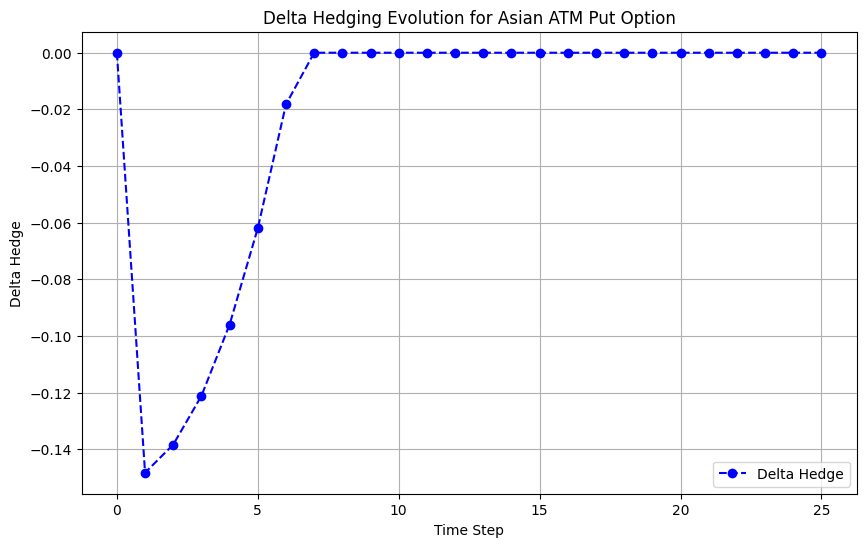

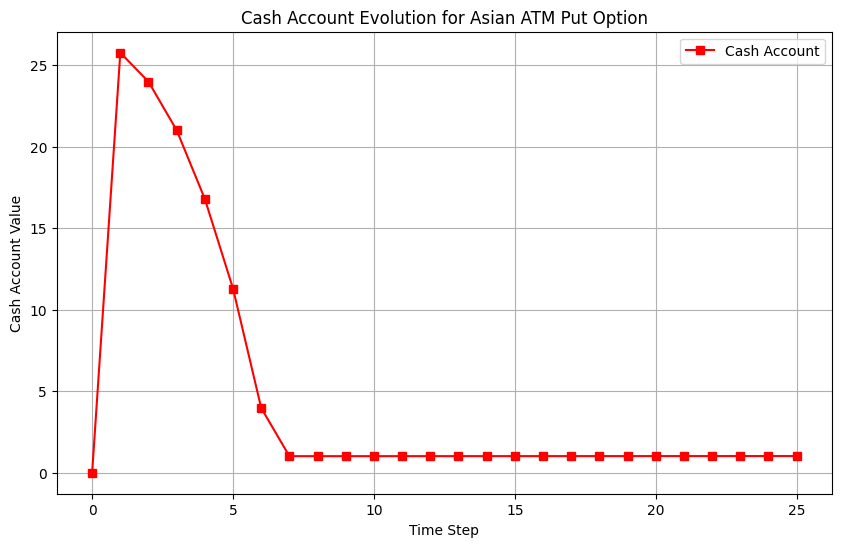

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
S0 = 180  # Initial stock price
K = 182  # Strike price
r = 0.02  # Risk-free rate (2%)
sigma = 0.25  # Volatility (25%)
T = 6 / 12  # 6 months expiration
n = 25  # Number of steps in binomial tree
dt = T / n  # Time step
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Generate binomial tree for stock prices
stock_tree = np.zeros((n + 1, n + 1))
average_tree = np.zeros((n + 1, n + 1))  # Store average prices

for i in range(n + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

# Compute the Asian Put Option Price
option_tree = np.zeros((n + 1, n + 1))

# Asian option payoff depends on average stock price
for j in range(n + 1):
    avg_stock_price = np.mean(stock_tree[: j + 1, n])  # Average up to step n
    option_tree[j, n] = max(K - avg_stock_price, 0)  # Payoff for Asian Put

# Backward induction for option pricing
for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        avg_stock_price = np.mean(stock_tree[: j + 1, i])  # Average up to step i
        early_exercise = max(K - avg_stock_price, 0)
        discounted_value = np.exp(-r * dt) * (p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1])
        option_tree[j, i] = max(early_exercise, discounted_value)  # Asian option pricing

asian_put_price = option_tree[0, 0]  # Price at time 0

# Compute Delta at each node (hedge ratio)
delta_tree = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1):
        delta_tree[j, i] = (option_tree[j, i + 1] - option_tree[j + 1, i + 1]) / (stock_tree[j, i + 1] - stock_tree[j + 1, i + 1])

# Simulate one path and track cash account
sample_path = [S0]
cash_account = [0]
delta_hedge = [0]

for i in range(n):
    move = np.random.choice([1, -1])  # 1 = up move, -1 = down move
    prev_stock = sample_path[-1]
    new_stock = prev_stock * (u if move == 1 else d)
    sample_path.append(new_stock)

    # Compute delta for this step
    delta_new = delta_tree[min(i, n - 2), min(i, n - 2)]
    delta_hedge.append(delta_new)

    # Adjust cash account (buy/sell shares based on new delta)
    shares_bought_sold = delta_new - delta_hedge[-2]
    transaction_cost = shares_bought_sold * new_stock
    new_cash = (cash_account[-1] * np.exp(r * dt)) - transaction_cost
    cash_account.append(new_cash)

# Create a dataframe to track results
hedging_results = pd.DataFrame({
    "Step": range(n + 1),
    "Stock Price": sample_path,
    "Delta Hedge": delta_hedge,
    "Cash Account": cash_account
})

print(hedging_results)


# Plot Delta Hedging Evolution
plt.figure(figsize=(10, 6))
plt.plot(range(n + 1), delta_hedge, label="Delta Hedge", linestyle="--", marker="o", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Delta Hedge")
plt.title("Delta Hedging Evolution for Asian ATM Put Option")
plt.legend()
plt.grid(True)
plt.show()

# Plot Cash Account Evolution
plt.figure(figsize=(10, 6))
plt.plot(range(n + 1), cash_account, label="Cash Account", linestyle="-", marker="s", color='red')
plt.xlabel("Time Step")
plt.ylabel("Cash Account Value")
plt.title("Cash Account Evolution for Asian ATM Put Option")
plt.legend()
plt.grid(True)
plt.show()
